In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

from math import sqrt

plt.rcParams['font.size'] = 12


# Dataset “auto-mpg”

- Проверьте MPG на нормальность (все данные, затем по origin: USA/Europe/Japan). Используйте точечные оценки параметров. Постройте доверительные интервалы для μ и σ нормального распределения.
- Проверьте гипотезу: acceleration ~ Exponential (оценка λ = 1/mean).
- Проверьте гипотезу: число автомобилей по model_year ~ Poisson(λ = mean per year).

In [2]:
columnNames = [
    'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
    'acceleration', 'model_year', 'origin', 'car_name'
]

autoMpgDataFrame = pd.read_csv(
    'datasets/auto-mpg.data',
    delim_whitespace=True,
    names=columnNames,
    na_values='?'
)
autoMpgDataFrame = autoMpgDataFrame.dropna().reset_index(drop=True)

print('Размер выборки auto-mpg:', len(autoMpgDataFrame))
autoMpgDataFrame.head()


Размер выборки auto-mpg: 392


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Доверительные интервалы

In [3]:
def confidenceIntervalForMean(sampleSeries, confidenceLevel=0.95):
    n = sampleSeries.size
    meanValue = sampleSeries.mean()
    sdValue = sampleSeries.std(ddof=1)
    alpha = 1 - confidenceLevel
    tCritical = sps.t.ppf(1 - alpha/2, df=n-1)
    marginError = tCritical * sdValue / sqrt(n)
    return meanValue - marginError, meanValue + marginError

def confidenceIntervalForSigma(sampleSeries, confidenceLevel=0.95):
    # CI для σ при нормальности через хи-квадрат
    n = sampleSeries.size
    sampleVariance = sampleSeries.var(ddof=1)
    alpha = 1 - confidenceLevel
    chi2Lower = sps.chi2.ppf(alpha/2, df=n-1)
    chi2Upper = sps.chi2.ppf(1 - alpha/2, df=n-1)
    lowerSigma = sqrt((n-1) * sampleVariance / chi2Upper)
    upperSigma = sqrt((n-1) * sampleVariance / chi2Lower)
    return lowerSigma, upperSigma

## Проверка нормальности MPG (вся выборка и по origin)

N = 392
Среднее (точечная оценка): 23.445918367346938
Выборочная дисперсия (точечная оценка): 60.91814186544184
Выборочное SD: 7.8050074865717995

Shapiro-Wilk: statistic = 0.9672 , p-value = 0.0

Anderson-Darling statistic = 3.5321
Критические значения: [0.57  0.649 0.779 0.909 1.081]
Соответствующие уровни: [15.  10.   5.   2.5  1. ]

Kolmogorov-Smirnov (fitted): statistic = 0.0818 , p-value = 0.009956


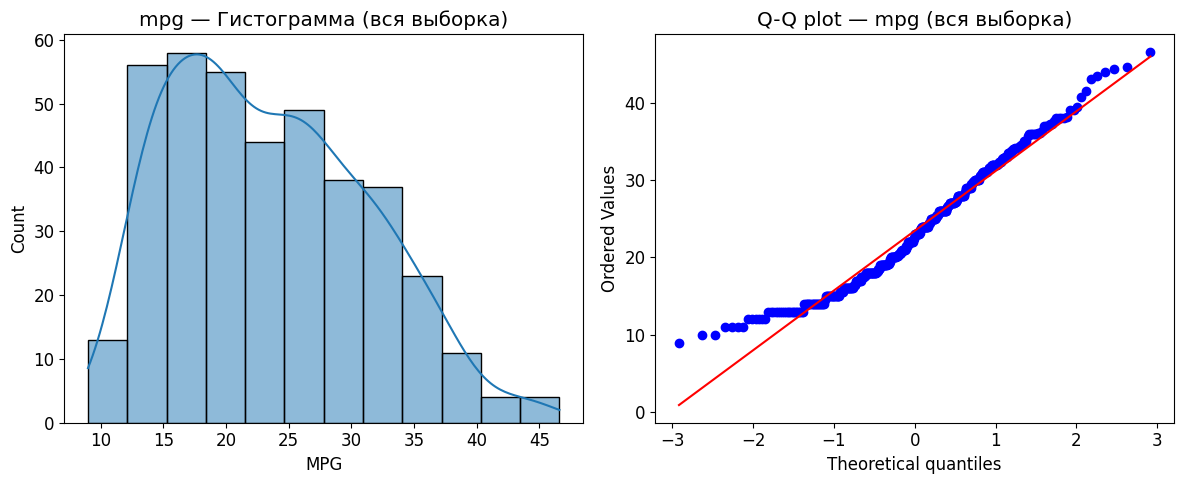

In [4]:
mpgSeries = autoMpgDataFrame['mpg'].dropna()
nSample = mpgSeries.size
meanMpg = mpgSeries.mean()
varMpg = mpgSeries.var(ddof=1)
sdMpg = mpgSeries.std(ddof=1)

print('N =', nSample)
print('Среднее (точечная оценка):', meanMpg)
print('Выборочная дисперсия (точечная оценка):', varMpg)
print('Выборочное SD:', sdMpg)

# Шапиро-Уилк
shapiroStatistic, shapiroPvalue = sps.shapiro(mpgSeries)
print('\nShapiro-Wilk: statistic =', round(shapiroStatistic,4), ', p-value =', round(shapiroPvalue,6))

# Anderson-Darling
andersonResult = sps.anderson(mpgSeries, dist='norm')
print('\nAnderson-Darling statistic =', round(andersonResult.statistic,4))
print('Критические значения:', andersonResult.critical_values)
print('Соответствующие уровни:', andersonResult.significance_level)

# KS тест
ksStatistic, ksPvalue = sps.kstest(mpgSeries, 'norm', args=(meanMpg, sdMpg))
print('\nKolmogorov-Smirnov (fitted): statistic =', round(ksStatistic,4), ', p-value =', round(ksPvalue,6))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Гистограмма
sns.histplot(mpgSeries, kde=True, ax=axes[0])
axes[0].set_title('mpg — Гистограмма (вся выборка)')
axes[0].set_xlabel('MPG')

# Q-Q
sps.probplot(mpgSeries, dist='norm', plot=axes[1])
axes[1].set_title('Q-Q plot — mpg (вся выборка)')

plt.tight_layout()
plt.show()

---- USA ----
N = 245 Mean = 20.0334693877551 SD = 6.440384098813329
Shapiro-Wilk: statistic = 0.9337 , p-value = 0.0
KS (with fitted mean/sd): statistic = 0.1147 , p-value = 0.002883
CI mean = (19.223000576918547, 20.843938198591655)
CI sigma = (5.916137175335694, 7.067368787617381)

---- Europe ----
N = 68 Mean = 27.602941176470587 SD = 6.580182154812889
Shapiro-Wilk: statistic = 0.9462 , p-value = 0.005422
KS (with fitted mean/sd): statistic = 0.1109 , p-value = 0.346859
CI mean = (26.010197775669745, 29.19568457727143)
CI sigma = (5.630135314412466, 7.918950866176664)

---- Japan ----
N = 79 Mean = 30.450632911392404 SD = 6.090048069738324
Shapiro-Wilk: statistic = 0.9797 , p-value = 0.241967
KS (with fitted mean/sd): statistic = 0.1182 , p-value = 0.202785
CI mean = (29.08653647298184, 31.814729349802967)
CI sigma = (5.266143490931947, 7.221976426332964)



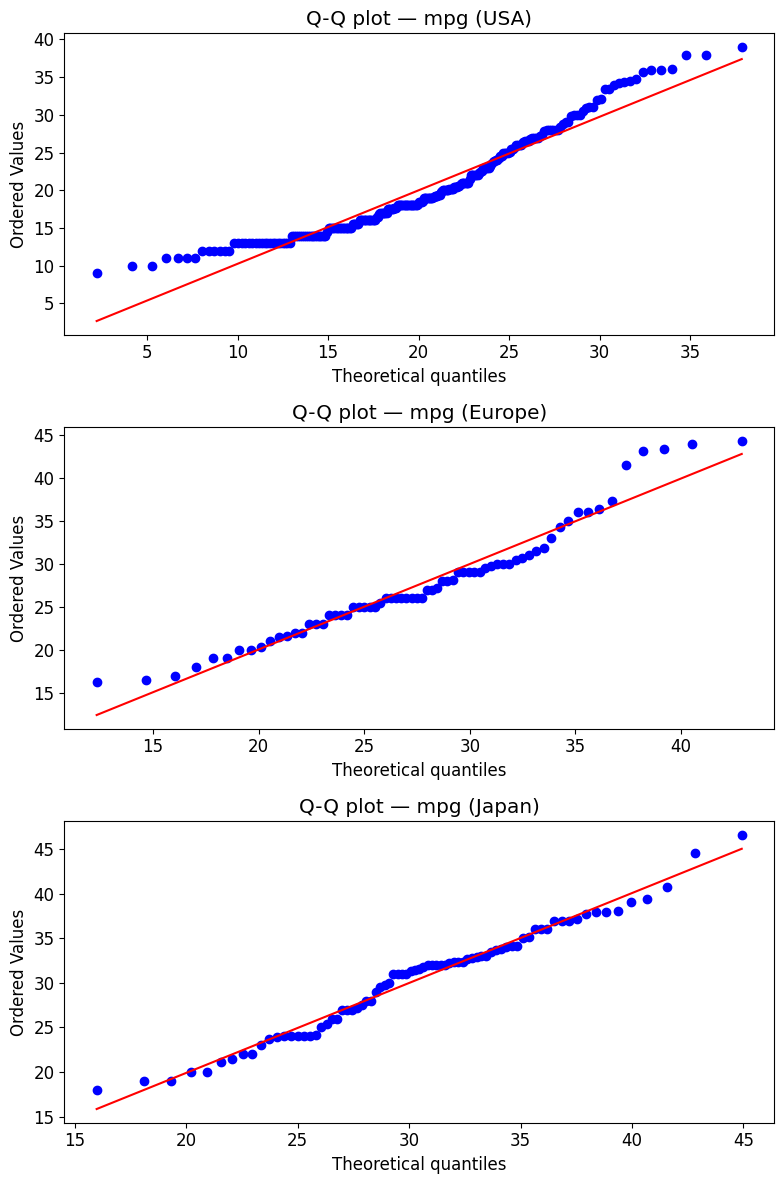

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

origin_groups = [(1, 'USA'), (2, 'Europe'), (3, 'Japan')]

for i, (originCode, originLabel) in enumerate(origin_groups):
    subsetSeries = autoMpgDataFrame.loc[autoMpgDataFrame['origin']==originCode, 'mpg'].dropna()
    nSubset = subsetSeries.size
    meanSubset = subsetSeries.mean()
    sdSubset = subsetSeries.std(ddof=1)
    print('----', originLabel, '----')
    print('N =', nSubset, 'Mean =', meanSubset, 'SD =', sdSubset)
    
    # Shapiro
    shapiroStatisticSub, shapiroPvalueSub = sps.shapiro(subsetSeries)
    print('Shapiro-Wilk: statistic =', round(shapiroStatisticSub,4), ', p-value =', round(shapiroPvalueSub,6))
    
    # KS с параметрами
    ksStatisticSub, ksPvalueSub = sps.kstest(subsetSeries, 'norm', args=(meanSubset, sdSubset))
    print('KS (with fitted mean/sd): statistic =', round(ksStatisticSub,4), ', p-value =', round(ksPvalueSub,6))
    
    print('CI mean =', confidenceIntervalForMean(subsetSeries, 0.95))
    print('CI sigma =', confidenceIntervalForSigma(subsetSeries, 0.95))
    print()
    
    # Q-Q plot на i-й оси
    sps.probplot(subsetSeries, dist='norm', sparams=(meanSubset, sdSubset), plot=axes[i])
    axes[i].set_title(f'Q-Q plot — mpg ({originLabel})')

plt.tight_layout()
plt.show()

## Доверительные интервалы для μ и σ (вся выборка и по origin)

In [6]:
print('=== Вся выборка ===')
print('CI mean (95%):', confidenceIntervalForMean(mpgSeries, 0.95))
print('CI sigma (95%):', confidenceIntervalForSigma(mpgSeries, 0.95))

origin_groups = [(1, 'USA'), (2, 'Europe'), (3, 'Japan')]
for originCode, originLabel in origin_groups:
    subsetSeries = autoMpgDataFrame.loc[autoMpgDataFrame['origin']==originCode, 'mpg'].dropna()
    print(f'\n=== {originLabel} ===')
    print('CI mean (95%):', confidenceIntervalForMean(subsetSeries, 0.95))
    print('CI sigma (95%):', confidenceIntervalForSigma(subsetSeries, 0.95))

=== Вся выборка ===
CI mean (95%): (22.670877187773137, 24.22095954692074)
CI sigma (95%): (7.2942196014673515, 8.393308538879504)

=== USA ===
CI mean (95%): (19.223000576918547, 20.843938198591655)
CI sigma (95%): (5.916137175335694, 7.067368787617381)

=== Europe ===
CI mean (95%): (26.010197775669745, 29.19568457727143)
CI sigma (95%): (5.630135314412466, 7.918950866176664)

=== Japan ===
CI mean (95%): (29.08653647298184, 31.814729349802967)
CI sigma (95%): (5.266143490931947, 7.221976426332964)


## Проверка Exponential для acceleration

N observations = 392
Mean acceleration (sec): 15.541326530612244
MLE lambda (1/mean): 0.06434457174748039
KS test vs Exponential(loc=0, scale=meanAcceleration): statistic = 0.4792 , p-value = 0.0


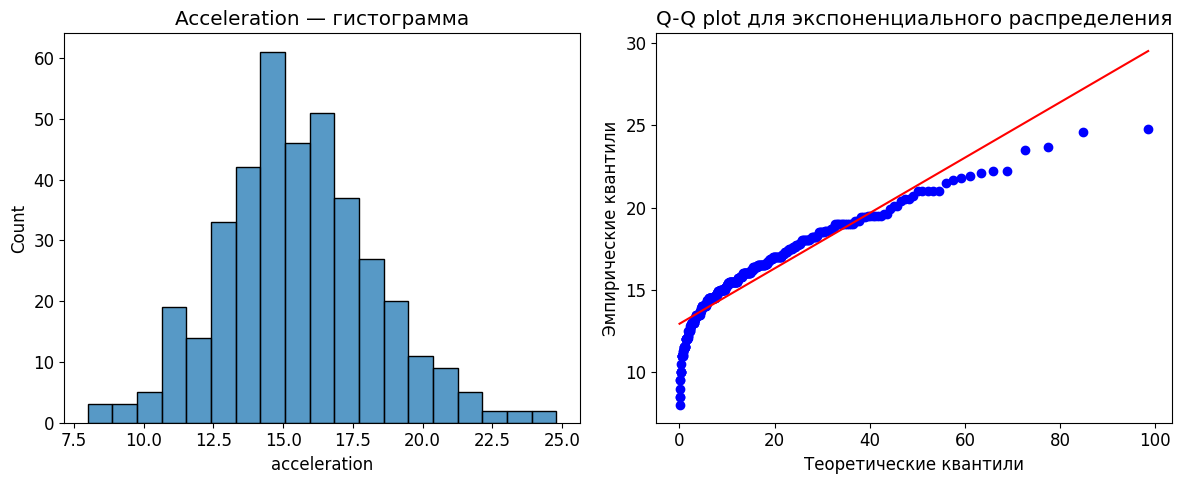

In [7]:
# Acceleration значения (в секундах)
accelerationSeries = autoMpgDataFrame['acceleration'].dropna()
nObservations = accelerationSeries.size
meanAcceleration = accelerationSeries.mean()
lambdaEstimate = 1.0 / meanAcceleration if meanAcceleration > 0 else np.nan

print('N observations =', nObservations)
print('Mean acceleration (sec):', meanAcceleration)
print('MLE lambda (1/mean):', lambdaEstimate)

# KS test: сравним данные с экспоненциальным с scale=meanAcceleration (loc=0)
ksStatisticExp, ksPvalueExp = sps.kstest(accelerationSeries, 'expon', args=(0, meanAcceleration))
print('KS test vs Exponential(loc=0, scale=meanAcceleration): statistic =', round(ksStatisticExp,4), ', p-value =', round(ksPvalueExp,6))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Гистограмма на первом подграфике
sns.histplot(accelerationSeries, kde=False, ax=axes[0])
axes[0].set_title('Acceleration — гистограмма')

# Q-Q plot
sps.probplot(accelerationSeries, dist='expon', sparams=(0, meanAcceleration), plot=axes[1])
axes[1].set_title('Q-Q plot для экспоненциального распределения')
axes[1].set_xlabel('Теоретические квантили')
axes[1].set_ylabel('Эмпирические квантили')

plt.tight_layout()
plt.show()


## Проверка Poisson для числа автомобилей по model_year

In [8]:
# Подсчёт числа автомобилей по годам модели
modelYearSeries = autoMpgDataFrame['model_year'].dropna().astype(int)
countsByYear = modelYearSeries.value_counts().sort_index().reindex(range(70, 83), fill_value=0)

# Распределение количества автомобилей в год: для k=0,1,2,...
countsOfCounts = pd.Series(countsByYear.values).value_counts().sort_index()
meanPerYear = countsByYear.mean()
lambdaPoisson = meanPerYear

print('Lambda Poisson =', lambdaPoisson)

# χ²: observed и expected frequencies
maxObserved = int(countsOfCounts.index.max())
observed = np.array([countsOfCounts.get(k, 0) for k in range(maxObserved + 1)])
expectedProbs = np.array([sps.poisson.pmf(k, mu=lambdaPoisson) for k in range(len(observed))])
expected = expectedProbs * 13  # 13 лет (70-82)

# Нормализация суммы (чтобы expected.sum() == 13)
expected *= 13 / expected.sum()

# χ²-тест (ddof=1 за оценку λ)
chi2Statistic, chi2Pvalue = sps.chisquare(f_obs=observed, f_exp=expected, ddof=1)
print('Chi-square statistic =', chi2Statistic, ', p-value =', chi2Pvalue)

ksStatisticInformal, ksPvalueInformal = sps.kstest(countsByYear.values, 'poisson', args=(lambdaPoisson,))
print('Informal KS statistic =', ksStatisticInformal, ', p-value =', ksPvalueInformal)

Lambda Poisson = 30.153846153846153
Chi-square statistic = 19.064721977821453 , p-value = 0.996975174361868
Informal KS statistic = 0.2583563179833455 , p-value = 0.2967581238986825
